In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.datasets

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame

In [3]:
#https://www.kaggle.com/datasets/uciml/student-alcohol-consumption/
df_mat = pd.read_csv('student-mat.csv') # math course
df_por = pd.read_csv('student-por.csv') # portuguease language course
df_both = pd.concat([df_mat, df_por])

In [4]:
df_both.info()

# FEATURES: grades (G1-G3), absences, age, parents edu (Medu, Fedu), parents status (Pstatus - T together, A - apart), study time, class
# failures, internet access (Y or N), goout (how often, 1-5), health (1-5)
# TARGET: Walc (weekend alcohol consumption), Dalc (workday alcohol consumption)

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher      10

In [5]:
new_parent_status = pd.get_dummies(df_both["Pstatus"], dtype=int, drop_first=True)
df_both["Pstatus"] = new_parent_status

new_internet = pd.get_dummies(df_both["internet"], dtype=int, drop_first=True)
df_both["internet"] = new_internet

df_both["Talc"] = df_both["Dalc"] + df_both["Walc"]
df_both = df_both[["G1", "G2", "G3", "absences", "age", "Medu", "Fedu", "Pstatus", "studytime", "failures", "internet", "goout", "health", "Talc"]]
df_both

,G1,G2,G3,absences,age,Medu,Fedu,Pstatus,studytime,failures,internet,goout,health,Talc
0,5,6,6,6,18,4,4,0,2,0,0,4,3,2
1,5,5,6,4,17,1,1,1,2,0,1,3,3,2
2,7,8,10,10,15,1,1,1,2,3,1,2,3,5
3,15,14,15,2,15,4,2,1,3,0,1,2,5,2
4,6,10,10,4,16,3,3,1,2,0,0,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,10,11,10,4,19,2,3,1,3,1,1,2,5,3
645,15,15,16,4,18,3,1,1,2,0,1,4,1,2
646,11,12,9,6,18,1,1,1,2,0,0,1,5,2
647,10,10,10,6,17,3,1,1,1,0,1,5,2,7


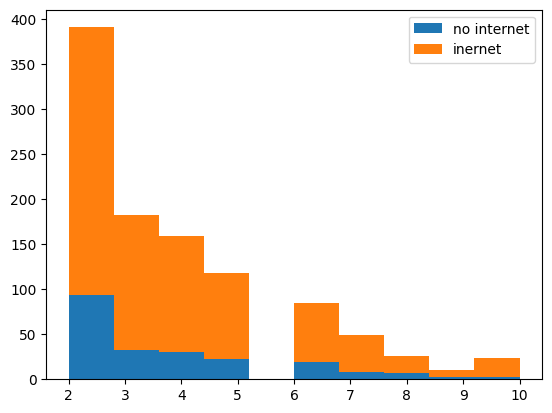

In [12]:
internet = df_both[df_both["internet"]>0]
no_internet = df_both[df_both["internet"]<1]

plt.hist([no_internet["Talc"], internet["Talc"]], 10, stacked=True, histtype="bar", label=["no internet", "inernet"])
plt.legend()